In [1]:
import pycaret

In [2]:
from pycaret.regression import *

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# 한글깨짐 해결
plt.rcParams['font.family'] ="Malgun Gothic"

In [5]:
import numpy as np 
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [6]:
data = pd.read_csv("../autoML/automldata.csv", index_col = 0 )

In [7]:
train = data[data['date'] < '2020-09-01']
test = data[data['date'] >= '2020-09-01']

## 배추

In [8]:
train = train[train['품목'] == '배추']
test = test[test['품목'] == '배추']
cat_f = ['주산지','요일']


setting = setup( data = train ,    target = '1_week' , categorical_features = cat_f,
               ignore_features = ['2_week','4_week','month','품목'] , normalize = True , session_id = 123)

,Description,Value
0,session_id,123
1,Target,1_week
2,Original Data,"(1454, 104)"
3,Missing Values,False
4,Numeric Features,96
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1017, 118)"


In [9]:
best = compare_models(sort = 'MAE' , exclude = ['omp','ard','par','ransac','huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,88.5012,24722.2209,156.0219,0.7362,0.9209,0.1107,1.0500
lightgbm,Light Gradient Boosting Machine,90.5867,21989.5039,146.9289,0.7663,0.8913,0.1201,0.4120
rf,Random Forest Regressor,94.5702,27719.2253,165.6043,0.7052,0.9274,0.1189,1.9080
gbr,Gradient Boosting Regressor,95.8469,26972.2647,162.7753,0.7123,0.9225,0.1233,0.8500
lasso,Lasso Regression,115.7527,33661.6982,181.7848,0.6416,0.9276,0.1621,0.0280
br,Bayesian Ridge,118.8534,34006.0346,182.9321,0.6367,0.9301,0.1682,0.0220
llar,Lasso Least Angle Regression,120.9133,35983.9432,188.6012,0.6166,0.9497,0.1720,0.0150
ridge,Ridge Regression,121.3730,34665.4250,184.6608,0.6303,0.9219,0.1762,0.0170
dt,Decision Tree Regressor,126.4535,47011.0226,215.1212,0.5018,1.2792,0.1704,0.0420
en,Elastic Net,128.4278,38007.8062,193.6831,0.5928,0.9512,0.1831,0.0160


### Extra Trees Regressor

In [10]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,88.5164,25073.1222,158.3449,0.7594,0.6390,0.1156
1,93.6657,27333.5785,165.3287,0.7267,1.0975,0.1017
2,81.4653,21001.5909,144.9193,0.7632,0.8651,0.1040
3,90.5629,19428.2119,139.3851,0.7852,0.6535,0.1196
4,88.2651,25592.6771,159.9771,0.6846,1.1466,0.1031
5,85.0796,29519.7167,171.8130,0.6116,1.1435,0.1059
6,93.2725,23512.2232,153.3370,0.7899,0.9179,0.1276
7,91.7006,33070.0131,181.8516,0.6876,1.1462,0.1046
8,70.8320,12316.1597,110.9782,0.8445,0.6739,0.1134
9,101.6524,30374.9154,174.2840,0.7096,0.9255,0.1116


In [11]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,87.7595,22680.7257,150.6012,0.7824,0.6253,0.1165
1,96.8688,28224.4286,168.0013,0.7178,1.0971,0.1059
2,92.1540,24067.0887,155.1357,0.7287,0.8685,0.1195
3,99.5026,20279.4572,142.4060,0.7758,0.6556,0.1332
4,92.2072,28360.9482,168.4071,0.6505,1.1507,0.1089
5,92.7941,29806.4396,172.6454,0.6078,1.1554,0.1205
6,100.1218,25993.9397,161.2264,0.7678,0.9310,0.1372
7,99.5896,38538.9639,196.3134,0.6359,1.1690,0.1113
8,77.2296,14515.0148,120.4783,0.8168,0.6824,0.1223
9,103.8824,30717.3504,175.2637,0.7063,0.9318,0.1136


In [13]:
print(tuned_model)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


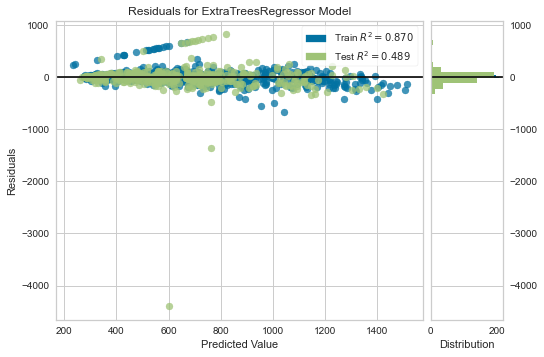

In [14]:
plot_model(tuned_model, plot = 'residuals')

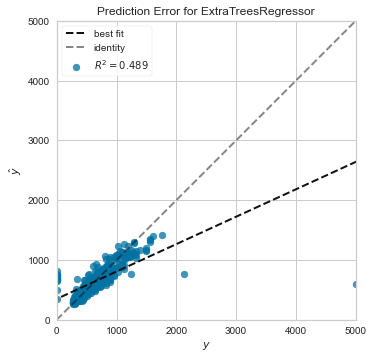

In [15]:
plot_model(tuned_model, plot = 'error')

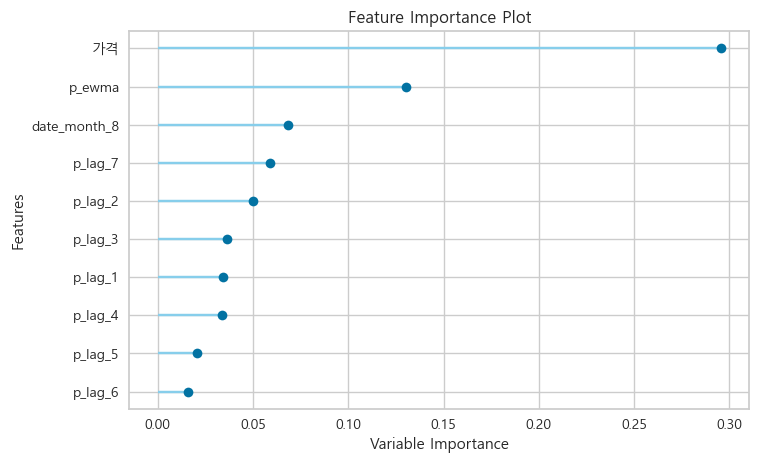

In [18]:
plot_model(tuned_model, plot = 'feature')

In [19]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,101.1710,71087.9846,266.6233,0.4892,1.0897,0.1123


,가격,거래량,경유가격,농산물,temp,max_Temp,min_Temp,wind,rain,dif_Temp,...,date_month_7,date_month_8,date_month_9,date_weekday_2,date_weekday_5,date_weekday_6,date_is_month_end_1,date_is_month_start_0,1_week,Label
0,-1.090414,-1.029292,-0.343039,0.745909,-1.386398,-1.207807,-1.557747,-0.905243,-0.206779,1.023621,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,343.0,326.346613
1,0.032119,2.421812,0.986687,-0.228091,-0.666839,-1.067920,-0.408127,1.086749,-0.254451,-1.424684,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,755.0,694.807193
2,-0.397857,-0.144402,-0.614868,-2.130270,1.278501,1.295821,1.289412,-0.905243,-0.206779,-0.180331,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,652.0,620.350905
3,-0.542277,0.532601,-0.634722,-2.180017,0.866292,0.399106,1.195291,-0.075247,0.768112,-1.974139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,430.0,491.518737
4,-0.217333,-0.862144,-1.390144,-1.304203,-2.051719,-2.323321,-1.705652,1.142082,-0.254451,-1.133796,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,733.0,602.240584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,-0.519301,-1.141732,0.580469,-0.026483,-2.275903,-2.563641,-1.840110,2.359410,-0.254451,-1.351962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,824.0,578.723758
433,-0.568535,0.245534,2.043667,1.960791,-0.334179,-0.070773,-0.458549,-0.407245,-0.254451,0.942819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,447.0,466.714790
434,-0.758906,-0.681766,2.077467,1.960791,-0.062988,-0.364895,0.196936,2.304077,-0.242533,-1.295401,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,441.0,449.059362
435,2.812194,-0.293613,-1.240281,1.582450,1.412289,1.471578,1.306219,-0.075247,-0.254451,0.175198,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1133.0,1274.958140


In [20]:
final_ml = finalize_model(tuned_model)
print(final_ml)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


In [21]:
unseen_pred = predict_model(final_ml, data = test)
unseen_pred.head()

,date,요일,품목,가격,거래량,주산지,경유가격,농산물,temp,max_Temp,...,w_lag_2m,w_lead_1,w_lead_2,w_lead_3,w_lead_4,p_lead_1,p_lead_2,p_lead_3,p_lead_4,Label
1705,2020-09-01,화요일,배추,1093.0,1279591.6,전남,1158.57,139.93,26.766667,31.600000,...,1.133333,2.900000,0.900000,0.633333,0.600000,975020.2,0.0,1104424.8,698187.5,1126.792286
1706,2020-09-02,수요일,배추,1150.0,1144746.8,전남,1158.51,139.93,25.266667,27.466667,...,0.800000,0.766667,2.900000,0.900000,0.633333,540843.7,975020.2,0.0,1104424.8,1110.612984
1707,2020-09-03,목요일,배추,1445.0,895628.0,전남,1158.62,139.93,23.500000,27.166667,...,2.533333,0.666667,0.766667,2.900000,0.900000,1181782.2,540843.7,975020.2,0.0,1114.145766
1708,2020-09-04,금요일,배추,1358.0,698187.5,전남,1158.34,139.93,22.866667,28.933333,...,1.633333,0.400000,0.666667,0.766667,2.900000,1302290.8,1181782.2,540843.7,975020.2,1099.724395
1709,2020-09-05,토요일,배추,1329.0,1104424.8,전남,1158.15,139.93,21.233333,24.866667,...,1.833333,0.666667,0.400000,0.666667,0.766667,1156811.6,1302290.8,1181782.2,540843.7,1176.638204


In [22]:
pred = unseen_pred[['date','1_week','Label']]
pred_0 = pred[pred['1_week'] > 0 ]

In [23]:
score = np.absolute(np.subtract(pred_0['1_week'], pred_0['Label'])) / pred_0['1_week']
score.mean()

0.3752775384915272

<AxesSubplot:xlabel='date', ylabel='1_week'>

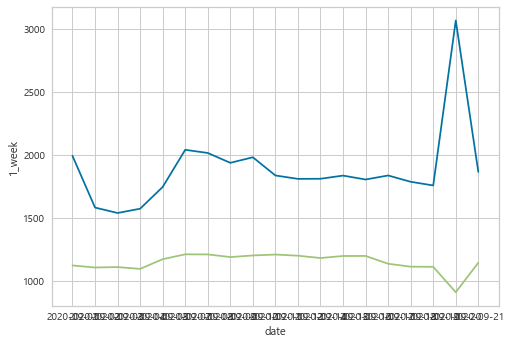

In [24]:
sns.lineplot(x= 'date', y= '1_week', data = pred_0)
sns.lineplot(x= 'date',y = 'Label', data = pred_0)